# Final figures for the paper entitled *A software-based focus system for wide-field optical microscopy*
(a.k.a "imPerfect FocuS")

This notebook can be used to regenerate all the plots from the article (some cells are  functions are located in the main `analyse_benchmark.ipynb` notebook).\\ The full data from which the data was extracted from can be provided by the authors (BW and IDC) upon request.

Few figures require a custom-made reader (MMpyreader) to be downloaded

# TODO
- avoid mmpyreader
- find why fig7 has different timestamp ...

In [1]:
%load_ext autoreload 
%autoreload 2 


In [2]:
from cycler import cycler
import matplotlib as mpl
import os
from os.path import abspath 
from tifffile import imread


import numpy as np
import matplotlib.pyplot as plt
try:
    from mmpyreader import MMpyreader
except:
    pass
from analysis_functions import *
import matplotlib.ticker as mticker

cm = 1/2.54 # convert inches to cm 
curdir = os.path.abspath(os.curdir)

from matplotlib.gridspec import GridSpec
gfpcmap = mpl.colors.LinearSegmentedColormap.from_list('gfpcmap',((0,0,0,1),(0,1,0,1)))
def clip99(img):
    return np.clip(normalize99(img,10,90),0,1)



# Matplotlib settings 
def set_mpl_for_pub():
    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams['lines.linewidth'] = 1.0
    mpl.rcParams.update({
        "pgf.texsystem": "xelatex",
        'font.family': 'serif',
        #'font.size': 15,
        'text.usetex': True,
        'text.latex.preamble': r'\usepackage{amsmath} \usepackage{siunitx} \newcommand{\mum}{$\mu$m}',
        'pgf.rcfonts': True,
    })
    
    mpl.rcParams['axes.prop_cycle'] =  cycler(color=glasbey)

def reset_mpl(): 
    mpl.rcParams.update(mpl.rcParamsDefault)
# for some reason matplotlib inline needs to be forced every time rc parameters are reset ... 


In [3]:
set_mpl_for_pub()
%matplotlib inline 

# Fig 2

## Fig 2A

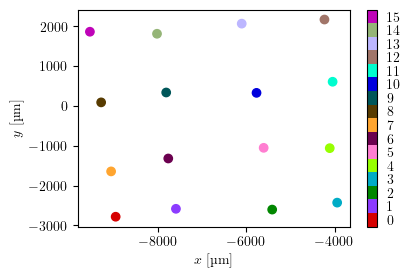

In [4]:
# Plot dots position
# #1 and #2 are the closest, they should therefore be best-corrected ones.
fig,ax = plot_pos('../Data/dots_pos_12h07.pos',labels=False,color=glasbey)
ax.set_xlabel(r'$x$ [\unit{\micro\meter}]');
ax.set_ylabel(r'$y$ [\unit{\micro\meter}]');
fig.set_size_inches(4, 8/3, forward=True)
#plt.savefig('Plots/fig_2c.pdf')

## Fig 2C

In [5]:
imgs = imread('../Data/all_marks.tif')

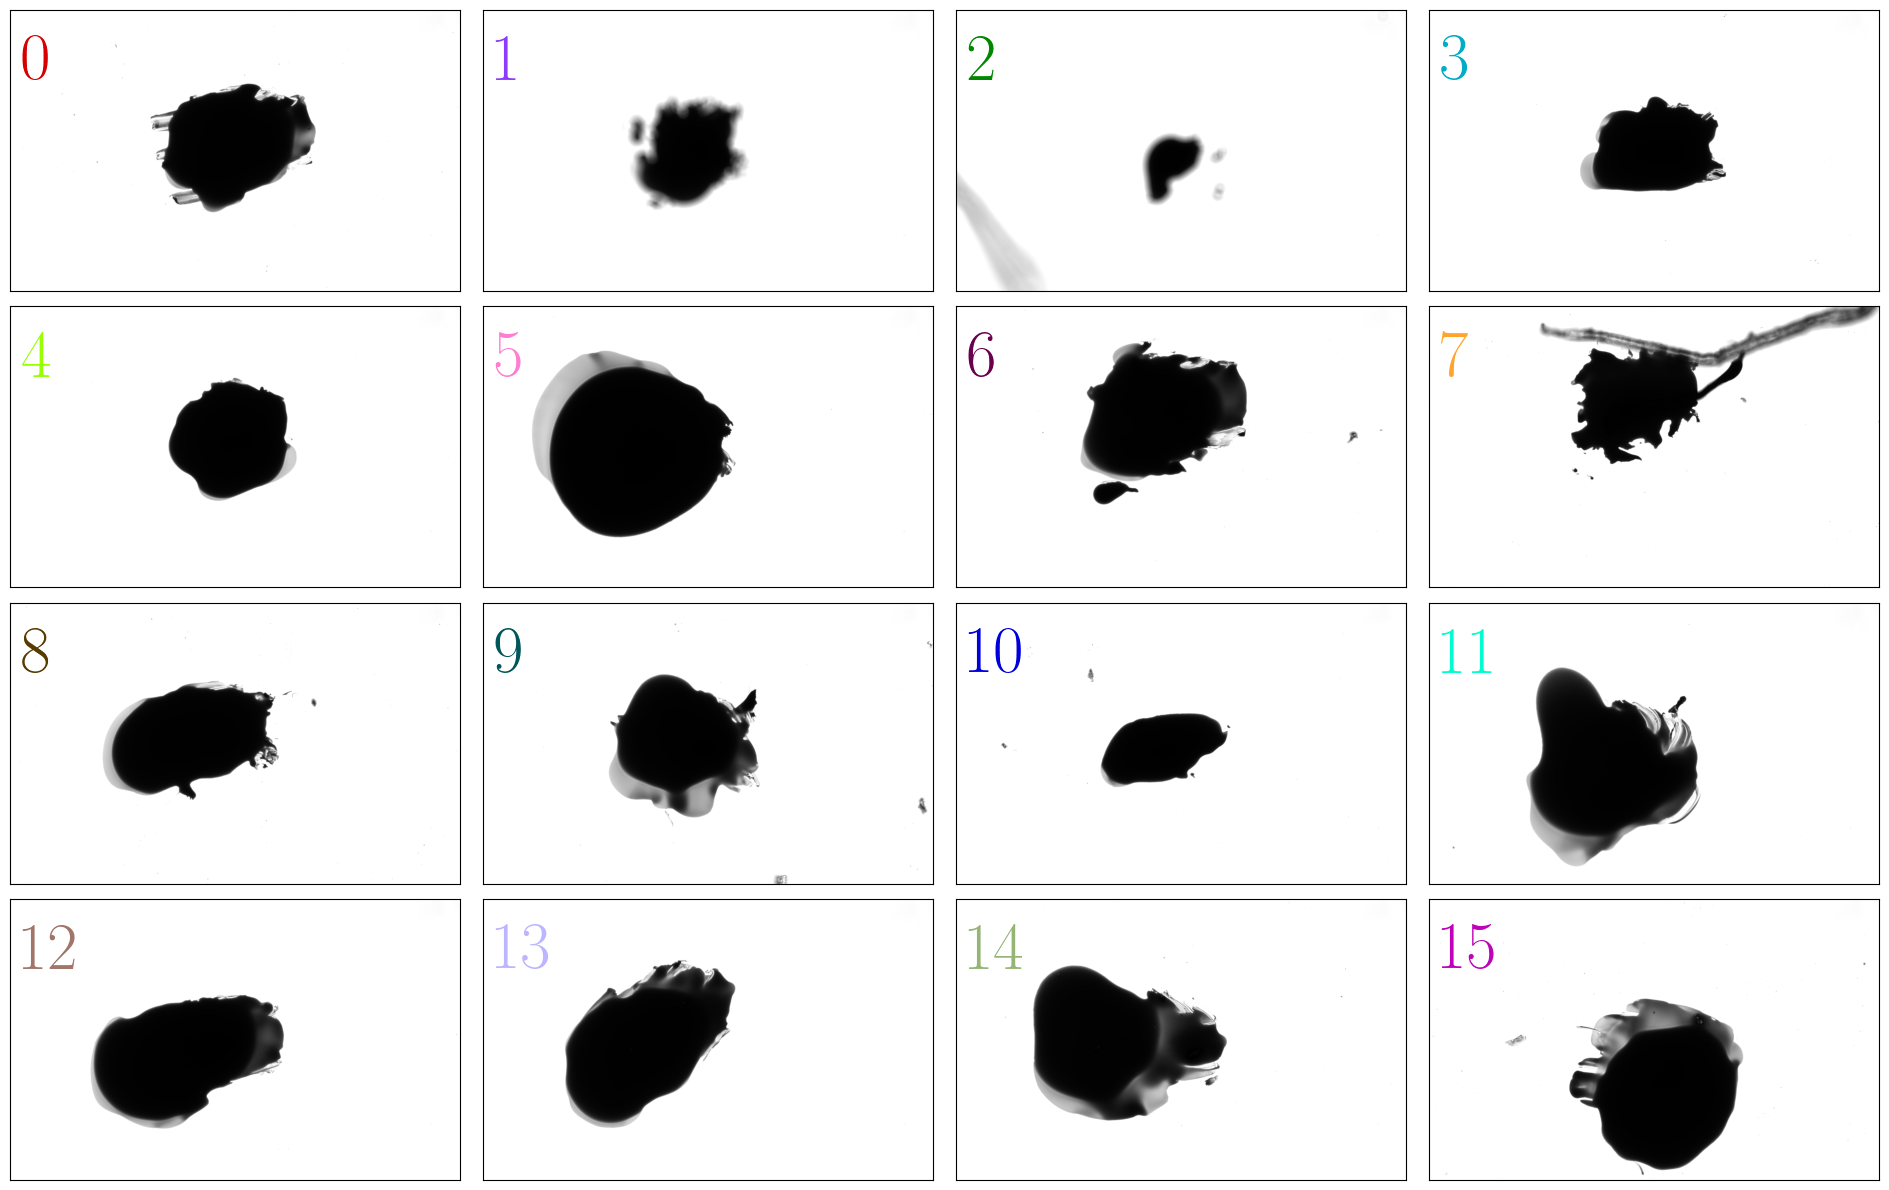

In [6]:
plot_images_in_grid(imgs.squeeze(),ncol=4)
#plt.savefig('Plots/fig_2d.png')

## Fig 2D, 2E

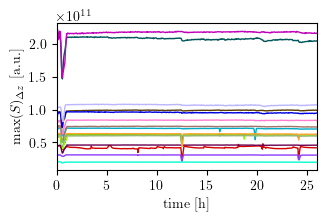

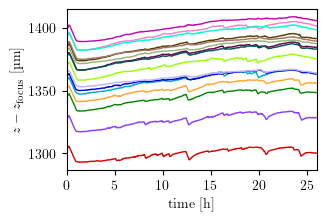

In [7]:
# dat =  parse_data('../Acquisitions/23-04-20_imperfect_focus_bench_try2/x20_r2.0_dz0.1/'
#                   #'../Acquisitions/24-07-03_iPFS_bench_redo_16dots/bench_3/' #  <---- the timeseries have some problem after ~25h 
#                  )
dat = pd.read_pickle('../Data/data_2DE.pkl')
# uncomment those lines for '../Acquisitions/24-07-03_iPFS_bench_redo_16dots/bench_3/' ( I think ...)
# remove some dots
#dat = dat[ [0] + list(range(3,16))] 
#dat = dat.drop([1,2]) # remove 
#dat.columns = dat.columns.remove_unused_levels()

# plot sharpness over time 
fig,ax = plt.subplots(figsize=(8*cm,16/3*cm),layout='constrained')
#ax.set_prop_cycle(default_cycler)

plot_exp(dat,'sh_max','mpl',fig=fig,lgd=False);
plt.xlabel('time [h]');
plt.ylabel('$\max(S)_{\Delta{z}}$ [a.u.]')
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax.margins(x=0)
#fig.savefig('Plots/fig_3a.pdf')
#fig.legend('off')


# plot z over time 
fig,ax = plt.subplots(figsize=(8*cm,16/3*cm),layout='constrained')
plot_exp(dat,'z','mpl',fig=fig,lgd=False);
ax.margins(x=0)
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax.set_xlabel('time [h]');
ax.set_ylabel(r'$z-z_\mathrm{focus}$ [\unit{\micro\meter}]');
#fig.savefig('Plots/fig_3b.pdf')
#plt.legend('off')

## 2F

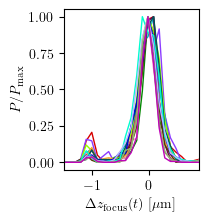

mean FWHM = 0.2375


In [8]:
fig,ax = plt.subplots(figsize=(5*cm,16/3*cm),layout='constrained')
fwhms=[]
for i in range(0,16):
    dzs=np.diff(np.array(dat[( i,          'z')]))
    hh,ee=np.histogram(dzs,bins=25,range=(-1.51,1.0-0.01))
    hh=hh/np.max(hh)
    ax.plot(ee[:-1],hh,color=glasbey[i])
    peak=(ee[:-1][hh>0.5])
    fwhms.append(max(peak)-min(peak))
ax.margins(x=0)
ax.set_xlabel(r'$\Delta z_\mathrm{focus}(t)$ [\mum]');
ax.set_ylabel(r'$P/P_\mathrm{max}$');
#plt.savefig('Plots/dz_focus.svg')
plt.show()
print("mean FWHM =",np.mean(fwhms))

# 2G

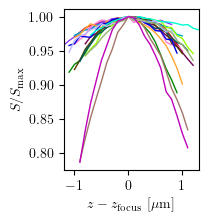

In [9]:
# this data set is limited to z=z_focus +/- 1 um
# dat_sh = parse_data_sh('../Acquisitions/23-04-20_imperfect_focus_bench_try2/x20_r2.0_dz0.1/'
#                        #'../Acquisitions/24-07-03_iPFS_bench_redo_16dots/bench_3/' <---- this one looks much better but not the timeseries ...
#                       )
dat_sh = pd.read_pickle('../Data/data_2G.pkl')
fig,ax = plt.subplots(figsize=(5*cm,16/3*cm),layout='constrained')
tref = [dat_sh[0]['t'].max() -3 ,]
for i,t in enumerate(tref): 
    for e in dat_sh.columns.levels[0]:
        idxs = dat_sh[e]['t'] == t
        sh = np.array(dat_sh[e]['sh'][idxs])
        sh = sh/sh.max()
        z = np.array(dat_sh[e]['z'][idxs])
        #z -= z.mean()
        z -= z[sh==1]
        #ax.plot(z,(sh-sh.min())/(sh.max()-sh.min()),label=e)  
        ax.plot(z,sh,c=glasbey[e])  
ax.margins(x=0)
ax.set_xlabel(r'$z-z_\mathrm{focus}$ [\mum]');
ax.set_ylabel(r'$S/S_{\rm max}$');
#plt.savefig('Plots/peaks_of_sharpness_functions.svg')

# Fig 3

In [26]:
ls ../Figures/example_picture_beads/

Beads4/                example2_picture_fluo_and_bf_montage_beads.png*
comments.txt*          example2_picture_fluo_and_bf_montage_beads.svg*
DisplaySettings.json*


## 3A (right)
see  "../Figures/example_picture_beads/"

## 3B

In [10]:
with np.load('../Data/sh_beads.npz') as dat:
    sh_beads_bf, sh_beads_fluo= dat['sh_beads_bf'], dat['sh_beads_fluo']

Text(0, 0.5, '$S_\\mathrm{beads}/S_\\mathrm{max}$')

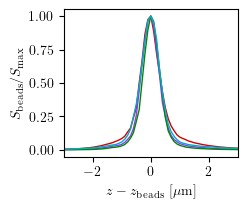

In [11]:
fig,ax = plt.subplots(figsize=(6*cm,5*cm),layout='constrained')
plot_all_sharpnesses(sh_beads_fluo,dx=0.1)
ax.set_xlim(-3,3)
ax.set_xlabel(r'$z-z_\mathrm{beads}$ [\mum]')
ax.set_ylabel(r'$S_\mathrm{beads}/S_\mathrm{max}$')
#ax.tick_params(labelbottom=False) 
# fig.savefig('Plots/fluor_beads_sharpness.svg')

## 3C

Text(0, 0.5, '$S_\\mathrm{beads}/S_\\mathrm{max}$')

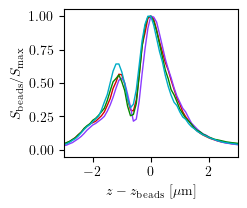

In [12]:
fig,ax = plt.subplots(figsize=(6*cm,5*cm),layout='constrained')
plot_all_sharpnesses(sh_beads_bf,dx=0.1)
plt.xlim(-3,3)
ax.set_xlabel(r'$z-z_\mathrm{beads}$ [\mum]')
ax.set_ylabel(r'$S_\mathrm{beads}/S_\mathrm{max}$')
# plt.savefig('Plots/BF_beads_sharpness.svg')

## 3D

In [13]:
with np.load('../Data/data_ipfs_23-04-27_beads_dz05.npz',allow_pickle=True) as dat:
    sh_stack_ipfs_dz05 = dat['sh']
    meta_ipfs_dz05 = dat['meta']

dat_dot =  parse_data('../Acquisitions/23-04-27_imperfect_focus_bench_with_beads/x20_dz0.5_dot_2/')
dat_dot = dat_dot['void'] # only one dot

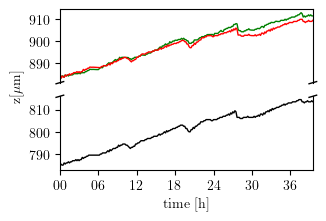

In [14]:
plot_zdot_and_zbeads(dat_dot,sh_stack_ipfs_dz05[:,:1],meta_ipfs_dz05[:,:1],grid=(1,1),figsize=(8*cm,16/3*cm),cbar=False)
#plt.savefig('Plots/fig_5a.pdf')

## 3E

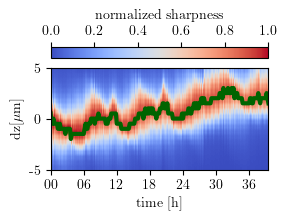

In [15]:
mpl.rc('lines', linewidth=3)
fig2 = plot_sh_regions(sh_stack_ipfs_dz05[:,:1],meta_ipfs_dz05[:,:1],dims_fig=[7*cm,16/3*cm],cbar=True,show_zbest=False)
#plt.savefig('Plots/dz_vs_time_beads.svg')

## 3F
TODO: fix colors

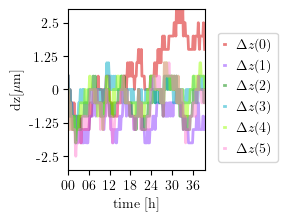

In [16]:
mpl.rc('lines', linewidth=2)
fig,ax,all_dz = plot_dz_same_plot(sh_stack_ipfs_dz05,meta_ipfs_dz05,dims_fig=[7*cm,16/3*cm],grid=(1,1),cbar=False,show_zbest=False)
plt.ylim(4,+16)
#plt.savefig('Plots/dz_vs_time_more_beads.svg')
plt.show()

## 3G

[-1.47531431] [0.54898483] [2.02429914]


/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a prominence of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)
/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a width of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)


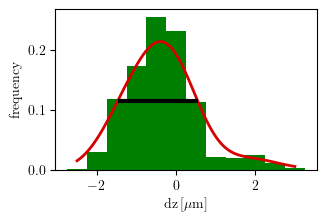

In [17]:
# Bin every positions 
fig,ax = plt.subplots(figsize=(8*cm,16/3*cm),layout='constrained')
all_dz = np.array(all_dz).flatten()
# make bins centered around midpoints between actual values
zvals,cnts = np.unique(all_dz,return_counts=True)


bins = one_bin_per_value(zvals) 
cnts, _ = np.histogram(all_dz,bins)
cnts = cnts/len(all_dz) #get frequencies instead of "density"
ax.stairs(cnts,bins,label='',color='green',fill=True)
#plt.hist(all_dz,density=True)
ax.set_xlabel(r'$\mathrm{dz} \left[\mathrm{\mu m} \right]$')
ax.set_ylabel('frequency');
# from sklearn.neighbors import KernelDensity
# norm_factor = sum(np.diff(bins)*cnts)

# mere attempt to fit the observations to a distribution
#kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(all_dz[:, np.newaxis])
#x = np.linspace(-3,3,100)[:, np.newaxis]
#log_dens = kde.score_samples(x)
#plt.fill(x[:, 0], np.exp(log_dens), fc="#AAAAFF")
#plt.plot(x[:,0],np.exp(log_dens)*norm_factor,label='distribution estimate',alpha=1)
# normalization factor: 
plot_and_compute_fwhm(all_dz,ax,linewidth=3.0)
plt.show()
#ig.savefig('./Plots/histogram_dz.svg')

# Fig 4 and 5
Third number printed is the FWHM of the fitted distribution

## Fig 4 iPFS

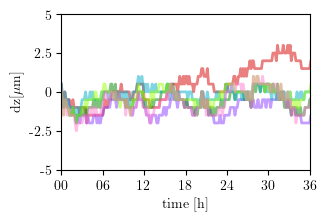

[-1.47531431] [0.54898483] [2.02429914]


/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a prominence of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)
/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a width of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)


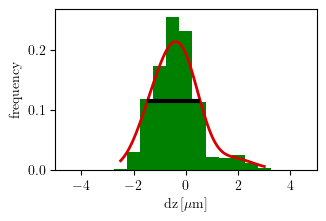

In [18]:
mpl.rc('lines', linewidth=2)
with np.load('../Data/data_ipfs_23-04-27_beads_dz05.npz',allow_pickle=True) as dat:
    sh = dat['sh']
    meta = dat['meta']
#mpl.rcParams['axes.prop_cycle'] =  default_cycler
plt.close('all')
fig ,ax, all_dz = plot_dz_same_plot(sh,meta,tmax=3600*36,dims_fig=[8*cm,16/3*cm],grid=(1,1),cbar=False,show_zbest=False)
plt.gca().set_xlim(0,3600*36)
plt.legend().remove()
plt.show()
#fig.savefig('Plots/dz_ipfs_allpos_23-04-27_beads_dz05_new.svg')

plt.close('all')
fig, ax = plt.subplots(figsize=(8*cm,16/3*cm),layout='constrained')
all_dz = plot_dz_hist(all_dz,ax=ax)
plot_and_compute_fwhm(all_dz,ax)
ax.set_xlim(-5,5)
#fig.savefig('Plots/hist_sh_cumulated_23-04-27_beads_dz05_new.svg')
plt.show()

## Fig 4 PFS

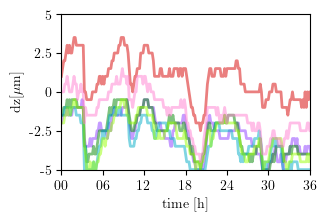

[-4.05418378] [-0.49032551] [3.56385827]


/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a prominence of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)
/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a width of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)


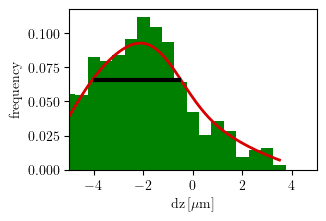

In [19]:
with np.load('../Data/data_pfs_23-04-27_beads_dz05.npz',allow_pickle=True) as dat:
    sh = dat['sh']
    meta = dat['meta']

plt.close('all')
fig ,ax, all_dz = plot_dz_same_plot(sh,meta,tmax=3600*36,dims_fig=[8*cm,16/3*cm],grid=(1,1),cbar=False,show_zbest=False)
plt.gca().set_xlim(0,3600*36)
plt.legend().remove()
plt.show()
#fig.savefig('Plots/dz_pfs_23-04-27_beads_dz05_new.svg')

plt.close('all')
fig, ax = plt.subplots(figsize=(8*cm,16/3*cm),layout='constrained')
all_dz = plot_dz_hist(all_dz,ax=ax)
plot_and_compute_fwhm(all_dz,ax,bandwidth=1.0)
ax.set_xlim(-5,5)
#fig.savefig('Plots/hist_sh_cumulated_pfs_23-04-27_beads_dz05_new.svg')
plt.show()


## Fig 5 iPFS

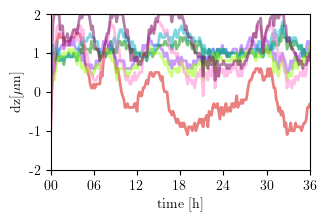

[0.67832027] [1.41732258] [0.7390023]


/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a prominence of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)
/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a width of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)


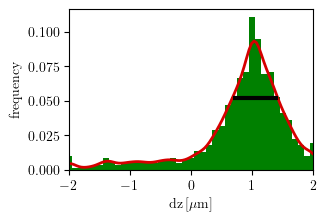

In [20]:
with np.load('../Data/data_23-05-26_ipfs_x40_beads_dz01.npz',allow_pickle=True) as dat:
    sh = dat['sh']
    meta = dat['meta']
#mpl.rcParams['axes.prop_cycle'] =  default_cycler
plt.close('all')
fig ,ax, all_dz = plot_dz_same_plot(sh,meta,tmax=3600*36,dims_fig=[8*cm,16/3*cm],grid=(1,1),cbar=False,show_zbest=False)
ax.set_xlim(0,3600*36)
plt.legend().remove()
plt.show()
#fig.savefig('Plots/dz_23-05-26_ipfs_x40_beads_dz01_new.svg')
plt.close('all')
fig, ax = plt.subplots(figsize=(8*cm,16/3*cm),layout='constrained')
all_dz = plot_dz_hist(all_dz,ax=ax)
plot_and_compute_fwhm(all_dz,ax,bandwidth=0.1)
ax.set_xlim(-2,2)
# fig.savefig('Plots/hist_sh_cumulated_23-05-26_ipfs_x40_beads_dz01_new.svg')
plt.show()

## Fig 5 PFS

<Figure size 640x480 with 0 Axes>

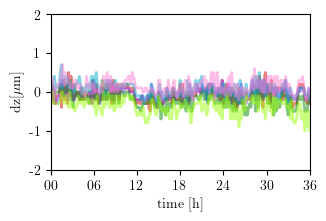

[-0.38787069] [0.25059088] [0.63846157]


/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a prominence of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)
/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:1015: PeakPropertyWarning: some peaks have a width of 0
  peak_widths(X,peaks, rel_height=0.5, prominence_data=None, wlen=None)


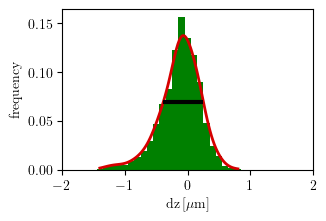

In [21]:
outfile = '../Data/data_23-06-07_pfs_x40_beads_dz01.npz'
with np.load(outfile,allow_pickle=True) as dat: 
    # Last timepoint is not complete
    sh,meta = dat['sh'],dat['meta']

plt.clf()
fig,ax, all_dz = plot_dz_same_plot(sh,meta,tmax=36*3600,dims_fig=[8*cm,16/3*cm],grid=(1,1),cbar=False,show_zbest=False)
# ax.set_xlim(0,0.1)
plt.gca().set_xlim(0,3600*36)
plt.legend().remove()
plt.show()
#plot_sh_regions(sh,meta,grid=(2,3),cbar=False,dims_fig=(6,2))
#plt.show()
# fig.savefig('Plots/dz_23-06-07_pfs_x40_beads_dz01_new.svg')

fig, ax = plt.subplots(figsize=(8*cm,16/3*cm),layout='constrained')
all_dz = plot_dz_hist(all_dz,ax=ax)
plot_and_compute_fwhm(all_dz,ax,bandwidth=0.1)
ax.set_xlim(-2,2)
# fig.savefig('Plots/hist_sh_cumulated_23-06-07_pfs_x40_beads_dz01_new.svg')
plt.show()

# Fig 6

In [22]:
out = '../Data/data_ipfs_23-04-27_beads_dz01.npz'
# sh_stack_dz01,stack_dz01,meta_dz01= compute_sh_stack('../Acquisitions/23-04-27_imperfect_focus_bench_with_beads/x20_3/')
# np.savez(out,sh=sh_stack_dz01,meta=meta_dz01)
with np.load(out,allow_pickle=True) as dat:
    sh_stack_ipfs_dz01 = dat['sh']
    meta_ipfs_dz01 = dat['meta']

/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/analysis_functions.py:457: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate()


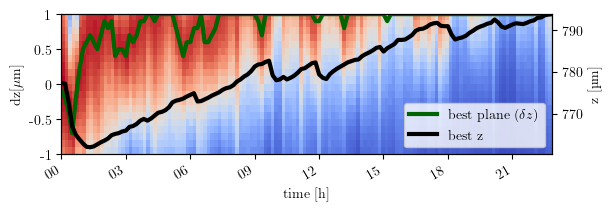

In [23]:
mpl.rcParams['lines.linewidth'] = 3
fig,axs = plot_sh_regions(sh_stack_ipfs_dz01[:,3:4],meta_ipfs_dz01[:,3:4],cbar=False,show_absrange=False,dims_fig=(6,2))
lgd = axs[0,0].get_legend()
lgd.set_loc('lower right')
plt.savefig('./Plots/failure_ipfs_x20_beads_dz01.pdf')

# Fig 7 

In [24]:
reset_mpl()
params = {
   'axes.labelsize': 'large',
   'xtick.labelsize': 'large',
   'ytick.labelsize': 'large',
   'lines.linewidth': 3.0
   }
mpl.rcParams.update(params)

In [25]:


# for now ca
Ts = [0,50,98]
coords = dict(P=1,Z=5,T=Ts,C=1)
# you cannot get these images unless you have the "custom reader"
# stack = reader.load_folder(abspath('../Acquisitions/25-11-13_iPFS_MG1655GFP/251411_x40_dz1_Dz10_5/'))
# imgs_fig=  stack.get_substack(**coords)[0].squeeze()
# therefore, just load them 
imgs_fig = imread('Data/imgs_colony.tif')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Analysis/Data/imgs_colony.tif'

In [ ]:
from tifffile import imread,imwrite
imwrite('Data/imgs_colony.tif',imgs_fig,compression='zstd')

In [ ]:
# alternate version focused on the cells 
win = 100
centers = [ (1024,1024), (800,1024), (400,1024)] 
plt.close('all')
fig = plt.figure(figsize=(7, 3),layout='constrained')
ax.text(0.05, 0.5, "A", weight="bold", horizontalalignment='left', verticalalignment='center',fontsize='xx-large')
panel_cdict = dict(fontsize=30, fontweight=50, va='top', ha='right')

times = ['{:.1f}h'.format(t*10/60) for t in Ts]
gs = GridSpec(4,3, figure=fig)

for i,(img,time,(x0,y0)) in enumerate(zip(imgs_fig,times,centers)):
    # img = img[450:1600,350:1500]
    img = img[y0-win//2:y0+win//2,x0-win//2:x0+win//2]
    p1,p99 = np.percentile(img,(5,99.9))
    img = np.clip(img,p1,p99)
    ax = fig.add_subplot(gs[:3, i])
    ax.imshow(img,cmap=gfpcmap)
    if i == 0:
        ax.text(-0.1, 1.0, 'A', **panel_cdict,transform=ax.transAxes,)

    # Global equalize
    #img = exposure.equalize_hist(img)
    # Equalization
    #footprint = disk(30)
    #img = rank.equalize(img, footprint=footprint)
    ax.imshow(img,cmap=gfpcmap)
    
    ax.text(4,10,'t='+time,color='white',fontsize='xx-large')
    ax.set_axis_off()

dat =  parse_data('../Acquisitions/25-11-13_iPFS_MG1655GFP/251114_x40_dz1_Dz10_dot_5/')
#dat[0].plot(y='sh_max',x='delta_time',legend=None,xlabel='time [h]',ylabel=r'z [$\mu$m]')
ax = fig.add_subplot(gs[3, :])
#ax2 = ax.twinx()
times, sh_max, z = dat[0]['delta_time'],dat[0]['sh_max'],dat[0]['z']
mask = times < 16.3
times, sh_max, z = times[mask],sh_max[mask],z[mask]
sh_ref = sh_max[0]
ax.plot(times,(sh_max)/sh_ref*100 - 100 ,color='blue')
# ax2.set_ylabel('sharpness [A.U.]')
ax.set_xlim(0,16)
ax.set_ylabel(r'$\Delta S/S_{t=0}$ [%]',fontsize='small')
ax.set_xlabel('time [h]',fontsize='small')
ax.set_xlabel('time [h]',fontsize='small')

ax.text(-0.1, 1.0, 'B', **panel_cdict,transform=ax.transAxes,)
plt.show()
#ax2.set_ylim(sh_max.min(),1.1*sh_max.max())
# fig.savefig('../Figures/fig_application_colonies_w_sharpness.pdf',dpi=300)



# Fig S1

In [ ]:
# Not sure if x should be inverted or not ...
set_mpl_for_pub()
fig,ax = plt.subplots(figsize=(8*cm,16/3*cm),layout='constrained')
plot_pos('../Acquisitions/23-04-27_imperfect_focus_bench_with_beads/position_list_17h28.pos',fig=fig,cbar=False)
plt.show()

# Fig S2

In [ ]:
reset_mpl()
mpl.rc('lines',linewidth=3.0)
mpl.rcParams['axes.prop_cycle'] =  cycler(color=glasbey)


In [ ]:
with np.load('../Data/data_ipfs_23-04-27_beads_dz05.npz',allow_pickle=True) as dat:
    sh_stack_ipfs_dz05 = dat['sh']
    meta_ipfs_dz05 = dat['meta']

ret = plot_all_sharpnesses(sh_stack_ipfs_dz05[0,:,0],dx=0.5)
plt.show()
#plt.savefig('Plots/sharpness_ipfs_23-04-27_beads_dz05.png')

# Fig S3

In [ ]:

Ts = [5,20,21,27]

# same drill, just load those images directly
#imgs_mark = dask_img('/mnt/dioscuri-nas/Ilyas/Imperfect_focus/Acquisitions/25-11-13_iPFS_MG1655GFP/251113_x40_dz1_Dz4_dot_1/251311_x40_dz1_Dz4_dot_1_MMStack.ome.tif')
imgs_mark = imread('Data/imgs_s3.tif')


In [ ]:

fig = plt.figure(figsize=(9, 5),layout='tight')
times = ['{:.1f}h'.format(t*10/60) for t in Ts]
gs = GridSpec(2,len(Ts), figure=fig)

imgs_toplot = imgs_mark[:,1100:1350,650:900]

for i,(img,time) in enumerate(zip(imgs_toplot,times)):
    # img = img[450:1600,350:1500]
    #p1,p99 = np.percentile(img,(5,99.9))
    #img = np.clip(img,p1,p99)
    ax = fig.add_subplot(gs[1, i])

    # Global equalize
    #img = exposure.equalize_hist(img)
    # Equalization
    #footprint = disk(30)
    #img = rank.equalize(img, footprint=footprint)
    ax.imshow(img,cmap='gray')
    
    ax.text(0.1,0.1,'t='+time,color='white',fontsize='xx-large',transform=ax.transAxes)
    ax.set_axis_off()

#dat =  parse_data('../Acquisitions/25-11-13_iPFS_MG1655GFP/251113_x40_dz1_Dz4_dot_1/')
dat = pd.read_pickle('../Data/data_s3.pkl')
#dat[0].plot(y='sh_max',x='delta_time',legend=None,xlabel='time [h]',ylabel=r'z [$\mu$m]')
ax = fig.add_subplot(gs[0, :])
#ax2 = ax.twinx()
times, sh_max, z = dat[0]['delta_time'],dat[0]['sh_max'],dat[0]['z']
mask = times < 4.5
times, sh_max, z = times[mask],sh_max[mask],z[mask]
sh_ref = sh_max.iloc[0]
# ax.plot(times, sh_max,color='blue')
# ax.scatter(times[Ts],sh_max[Ts],100,c='red')
# ax.set_ylabel('sharpness change [A.U.]')

ax.plot(times, z,color='blue')
ax.scatter(times[Ts],z[Ts],100,c='red')
ax.set_ylabel('z [$\mu$m]')

ax.set_xlabel('time [h]',fontsize='x-large')


ax.plot(times, z,color='green')

#ax2.set_ylim(sh_max.min(),1.1*sh_max.max())
#fig.savefig('../Figures/fig_SI_precautions.pdf',dpi=300)
plt.show()


# Fig S4

In [ ]:

imgs_mark = dask_img('../Acquisitions//24-07-12_iPFS_bacteria/240712_bacteria_dot_1/240712_bacteria_dot_1_MMStack.ome.tif')
winx,winy = 800,300
x0,y0 = (1100,800)
Ts = [1,54,100]

panel_cdict = dict(
      fontsize=30, fontweight=50, va='top', ha='right')
fig = plt.figure(figsize=(9, 5),layout='tight')
# ax.text(0.05, 0.5, "A", weight="bold", horizontalalignment='left', verticalalignment='center',fontsize='xx-large')

times = ['{:.1f}h'.format(t*10/60) for t in Ts]
gs = GridSpec(2,3, figure=fig)
imgs_toplot = imgs_mark[Ts,y0-winy//2:y0+winy//2,x0-winx//2:x0+winx//2]


for i,(img,time) in enumerate(zip(imgs_toplot,times)):
    # img = img[450:1600,350:1500]
    #p1,p99 = np.percentile(img,(5,99.9))
    #img = np.clip(img,p1,p99)
    ax = fig.add_subplot(gs[0, i])
    if i == 0:
        ax.text(-0.2, 1.0, 'A', **panel_cdict,transform=ax.transAxes,)
    # Global equalize
    #img = exposure.equalize_hist(img)
    # Equalization
    #footprint = disk(30)
    #img = rank.equalize(img, footprint=footprint)
    ax.imshow(img,cmap='gray')
    
    ax.text(0.1,0.1,'t='+time,color='white',fontsize='xx-large',transform=ax.transAxes)
    ax.set_axis_off()


dat =  pd.read_pickle('../Data/data_mark_s4_1.pkl')
#dat[0].plot(y='sh_max',x='delta_time',legend=None,xlabel='time [h]',ylabel=r'z [$\mu$m]')
ax = fig.add_subplot(gs[1, :1])
#ax2 = ax.twinx()
ts, sh_max, z = dat[0]['delta_time'],dat[0]['sh_max'],dat[0]['z']
mask = ts < 10
ts, sh_max, z = ts[mask],sh_max[mask],z[mask]
sh_ref = sh_max.iloc[0]
ax.plot(ts, sh_max,color='blue')
ax.scatter(ts[Ts],sh_max[Ts],100,c='red')
ax.set_ylabel('max sharpness [A.U.]')
ax.set_xlabel('time [h]')
ax.text(-0.20, 1.19, 'B', **panel_cdict,transform=ax.transAxes,)

dat2 = pd.read_pickle('../Data/data_mark_s4_2.pkl')
grouped = dat2.groupby('t')
ax = fig.add_subplot(gs[1, 1:])
ax.set_ylim(3*10**12,5.6*10**12)
for i,(img,time) in enumerate(zip(imgs_toplot,times)):
    df =  grouped.get_group(i)
    x,y = df['z'],df['sh']
    ax.scatter(x,y,label=time)

ax.set_ylabel('sharpness at time t [A.U.]')
ax.set_xlabel('z [$\mu$m]',fontsize='large')

ax.legend()

ax.text(-0.05, 1.19, 'C', **panel_cdict,transform=ax.transAxes,)
plt.show()